Opening raw data file E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif...
Isotrak not found
    Range : 0 ... 30719 =      0.000 ...    29.999 secs
Ready.
Reading 0 ... 30719  =      0.000 ...    29.999 secs...
Effective window size : 2.000 (s)


C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_9008\353296301.py:6: RuntimeWarning: This filename (E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r'E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif', preload=True)
C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_9008\353296301.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=80)


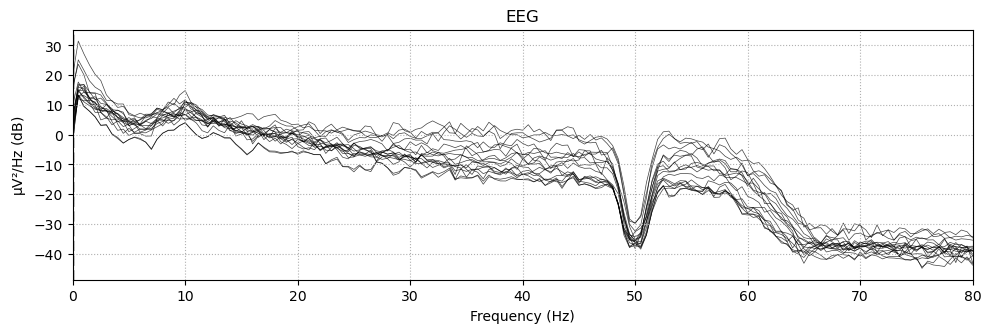

Opening raw-browser...
Effective window size : 2.000 (s)


C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_9008\353296301.py:21: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=0.5,fmax=4)


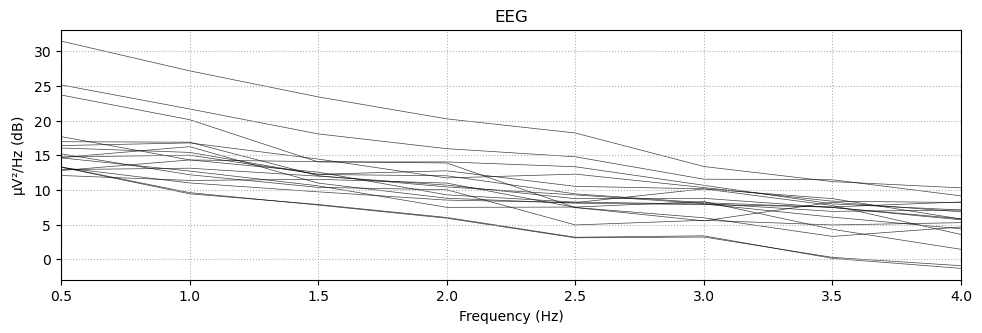

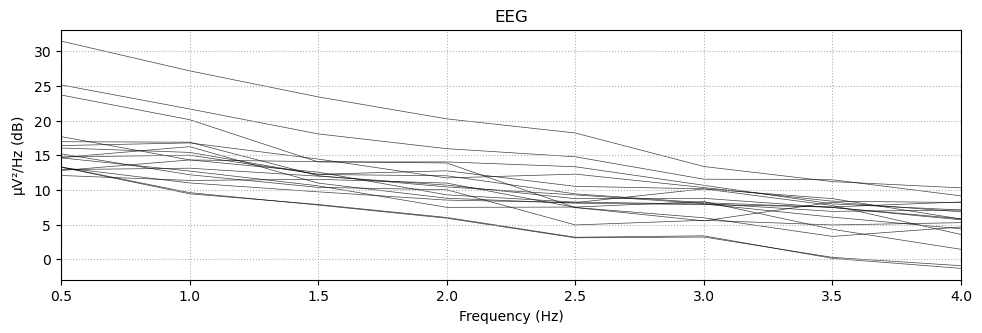

Closing raw-browser...
Channels marked as bad:
none


In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_multitaper

raw = mne.io.read_raw_fif(r'E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif', preload=True)

raw.plot_psd(fmax=80)

raw.plot()


# 设置分析频率的区间范围，这里有小数主要是为了和后面小波变换方法做对比（暂时未实现）。
freqs_bands = [
    {'name': 'Delta', 'fmin': 0.5, 'fmax': 4},
    {'name': 'Theta', 'fmin': 4, 'fmax': 8},
    {'name': 'Alpha', 'fmin': 8, 'fmax': 13},
    {'name': 'Beta',  'fmin': 13, 'fmax': 30},
    {'name': 'Gamma',  'fmin': 30, 'fmax': 60},
]
raw.plot_psd(fmin=0.5,fmax=4)

C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_19240\3393002182.py:55: RuntimeWarning: This filename (E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(r'E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif', preload=True)
C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_19240\3393002182.py:64: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.pick(['EEG Cz-AV']).plot_psd()


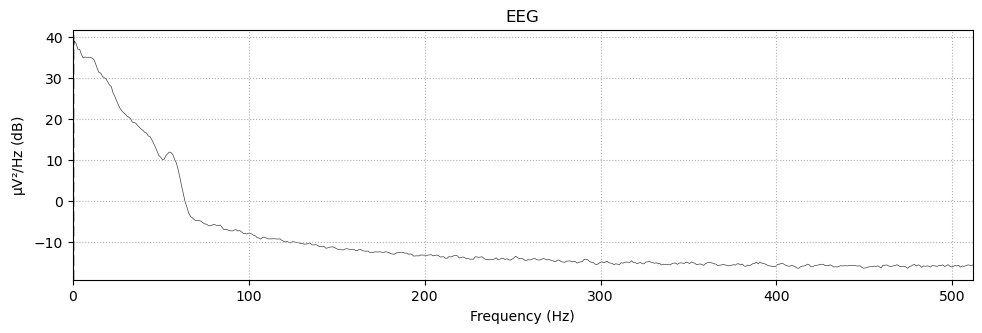

Exception in thread Thread-5:
Traceback (most recent call last):
  File "D:\Anaconda\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "D:\Anaconda\lib\threading.py", line 1378, in run
    self.function(*self.args, **self.kwargs)
  File "C:\Users\ANSHANJIAN\AppData\Local\Temp\ipykernel_19240\3393002182.py", line 32, in calculate_psd
  File "<decorator-gen-45>", line 12, in pick
  File "D:\Anaconda\lib\site-packages\mne\channels\channels.py", line 749, in pick
    picks = _picks_to_idx(self.info, picks, 'all', exclude,
  File "D:\Anaconda\lib\site-packages\mne\io\pick.py", line 1047, in _picks_to_idx
    picks = _picks_str_to_idx(info, picks, exclude, with_ref_meg,
  File "D:\Anaconda\lib\site-packages\mne\io\pick.py", line 1160, in _picks_str_to_idx
    raise ValueError(
ValueError: picks (['EEG-Cz']) could not be interpreted as channel names (no channel "['EEG-Cz']"), channel types (no type "EEG-Cz"), or a generic type (just "all" or "data")


In [1]:
# 导入必要的库
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_multitaper
import threading
import time

# 设置 MNE-Python 的日志级别为 False，以避免输出冗长的信息
mne.set_log_level(False)

# 设置分析频率的区间范围
iter_freqs = [
    {'name': 'Delta', 'fmin': 0, 'fmax': 4},
    {'name': 'Theta', 'fmin': 4, 'fmax': 8},
    {'name': 'Alpha', 'fmin': 8, 'fmax': 13},
    {'name': 'Beta', 'fmin': 13, 'fmax': 30},
    {'name': 'Gamma', 'fmin': 30, 'fmax': 60},
]

# 创建虚拟事件
def create_dummy_events(raw, duration=1):
    sfreq = raw.info['sfreq']
    events = np.array([[int(sfreq * i), 0, 1] for i in range(int(raw.n_times / (sfreq * duration)))])
    return events

# 定期计算和绘制 PSD 能量分布
def calculate_psd_periodically(epochs, interval_seconds):
    def calculate_psd():
        while True:
            # 对选定的脑电通道计算功率谱密度
            psds, freqs = psd_multitaper(epochs.pick(['EEG-Cz']), n_jobs=1)
            psds = np.squeeze(np.average(psds, axis=0))
            
            # 计算每个频段的能量和
            event_energy = []
            for iter_freq in iter_freqs:
                event_energy.append(np.sum(psds[(iter_freq['fmin'] < freqs) & (freqs < iter_freq['fmax'])]))

            # 绘制能量分布图
            plt.plot([xLabel['name'] for xLabel in iter_freqs], event_energy, marker='o', lw=0, ms=5)
            plt.title('PSD_SUM')
            plt.show()

            # 暂停指定的时间间隔
            time.sleep(interval_seconds)

    # 创建并启动定时器
    psd_timer = threading.Timer(0, calculate_psd)
    psd_timer.start()

# 主程序入口
if __name__ == '__main__':
    # 读取筛选好的 epoch 数据
    raw = mne.io.read_raw_fif(r'E:\学习资料\papers\数据\人民医院 患者脑电数据\脑电切片\SE切片\平均参考\第一批次\EAV-王纯钢-20220321.fif', preload=True)

    # 创建虚拟事件
    events = create_dummy_events(raw)
    
    # 使用虚拟事件创建 epochs
    epochs = mne.Epochs(raw, events, tmin=0, tmax=1, baseline=None, preload=True)

    # 在绘图中选择一个通道的 PSD
    epochs.pick(['EEG Cz-AV']).plot_psd()

    # 定期计算和绘制 PSD 能量分布
    calculate_psd_periodically(epochs, interval_seconds=60)  # 60 秒的时间间隔